<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [109]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score

2.4.1


## 2. Setting Options

In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [5]:
# reading the products dataset
productData_df = pd.read_csv('/content/drive/MyDrive/Great Learning/R8_Internal_Lab/product_data.csv')

In [6]:
# reading the reviews  dataset
reviews_df = pd.read_csv('/content/drive/MyDrive/Great Learning/R8_Internal_Lab/reviews.csv')

In [7]:
# checking the shape of the datasets 
print('Shape of products dataset : ', productData_df.shape)
print('Shape of review dataset : ', reviews_df.shape)

Shape of products dataset :  (720, 10)
Shape of review dataset :  (67986, 8)


In [8]:
# checking random samples
productData_df.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
304,B076BZ18GS,Nokia,Nokia 3310 TA-1036 Unlocked GSM 3G (At&T Tmobi...,https://www.amazon.com/Nokia-TA-1036-Unlocked-...,https://m.media-amazon.com/images/I/81Llml-HrS...,3.7000000,https://www.amazon.com/product-reviews/B076BZ18GS,15,0.0000000,0.0000000
241,B071H9KKKF,Samsung,Samsung Galaxy S8 Plus (S8+) (SM-G955FD) 4GB R...,https://www.amazon.com/Samsung-SM-G955FD-6-2-I...,https://m.media-amazon.com/images/I/61MF7kZkrI...,4.0000000,https://www.amazon.com/product-reviews/B071H9KKKF,480,450.1100000,0.0000000
279,B074XF6JCD,Motorola,Motorola Moto Z2 Force XT1789 64GB ATT only (S...,https://www.amazon.com/Motorola-Force-XT1789-S...,https://m.media-amazon.com/images/I/71b9BtbvjM...,3.5000000,https://www.amazon.com/product-reviews/B074XF6JCD,20,0.0000000,0.0000000
153,B01H93TCCM,Samsung,Samsung Galaxy S7 Active SM-G891A 32GB Sandy G...,https://www.amazon.com/Samsung-Galaxy-Active-S...,https://m.media-amazon.com/images/I/61jDf+QZG1...,3.6000000,https://www.amazon.com/product-reviews/B01H93TCCM,39,0.0000000,0.0000000
326,B077NTKFDB,Apple,Apple iPhone 7 Plus 256GB Unlocked GSM 4G LTE ...,https://www.amazon.com/Apple-iPhone-Unlocked-Q...,https://m.media-amazon.com/images/I/61C5dT6qy0...,3.6000000,https://www.amazon.com/product-reviews/B077NTKFDB,17,329.9700000,0.0000000


In [9]:
reviews_df.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
2808,B00836Y6B2,orlando guerra,5,"December 26, 2012",True,Wonderful Nokia phone,I find that Nokia phones overall provide excel...,2.0000000
24573,B01HFLRS38,Anna,1,"November 15, 2016",True,One Star,It shut off 2 months into using and won't turn...,nan
50817,B07GDW4N5C,Anthony Grimes,5,"March 11, 2019",True,Wife love her phone,The phone worked perfectly my wife loves it th...,nan
633,B002WTC1NG,DJ Hale,5,"August 11, 2014",True,Five Stars,This kept my mother off my back. Thanks,nan
60738,B07Q6ZZ4S1,Arvind,1,"October 3, 2019",True,Ban these Companies,Not a suitable product for US markets Us shoul...,1.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [10]:
productData_df = productData_df.drop(['url','image'], axis=1)

In [11]:
productData_df.shape

(720, 8)

In [12]:
productData_df.head()

,asin,brand,title,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [13]:
productData_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,720,720,B07NQNK5F4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,716,10,Samsung,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,720,718,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,720.0000000,NaN,NaN,NaN,3.7137500,0.7160138,1.0000000,3.3000000,3.8000000,4.1000000,5.0000000
reviewUrl,720,720,https://www.amazon.com/product-reviews/B007X6FFLS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totalReviews,720.0000000,NaN,NaN,NaN,105.6791667,167.6011014,1.0000000,7.0000000,32.0000000,122.2500000,983.0000000
price,720.0000000,NaN,NaN,NaN,234.9489306,200.0084407,0.0000000,97.5125000,188.9750000,336.7250000,999.9900000
originalPrice,720.0000000,NaN,NaN,NaN,63.6907778,172.4053696,0.0000000,0.0000000,0.0000000,0.0000000,999.9900000


In [14]:
reviews_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,67986,720,B00F2SKPIM,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,67984,47323,Amazon Customer,6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,67986.0000000,NaN,NaN,NaN,3.8079163,1.5829058,1.0000000,3.0000000,5.0000000,5.0000000,5.0000000
date,67986,2983,"December 11, 2019",234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verified,67986,2,True,61225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,67972,41489,Five Stars,6043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,67965,59811,Good,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpfulVotes,27215.0000000,NaN,NaN,NaN,8.2296895,31.9548772,1.0000000,1.0000000,2.0000000,5.0000000,990.0000000


### 4.3 From the above statistical summry, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

1. There are 10 unique products
2. The top brand is Samsung
3. Top title is Apple iPhone 6S, 64GB, Rose Gold - For AT&T
4. Range of rating Min:1 and Max: 5
5. Price range Min : 0 and Max : 999.99
6. Ratings of products can be infered to have a right skew.

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

In [24]:
# distribution of brand
productData_df['brand'].value_counts()

Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Name: brand, dtype: int64

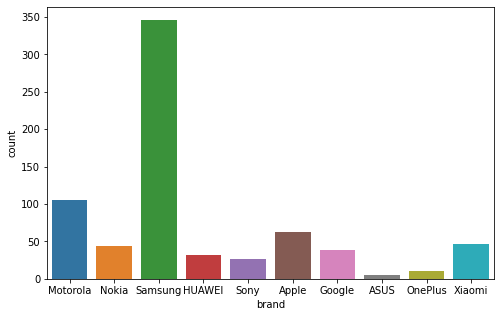

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(productData_df['brand'])
plt.show()

*   Samsung has the most number of products almost 50%
*   Motorola has second most number of products



In [ ]:
# distribution of rating
productData_df['rating'].value_counts()

4.1000000    59
3.8000000    55
4.0000000    52
3.9000000    47
3.7000000    46
3.5000000    43
3.6000000    40
3.2000000    37
3.3000000    34
5.0000000    34
4.4000000    32
4.2000000    31
4.5000000    31
4.3000000    28
3.1000000    21
3.4000000    21
3.0000000    20
2.9000000    16
1.0000000    16
2.8000000    10
4.6000000    10
2.7000000     8
2.5000000     6
4.7000000     5
2.4000000     4
2.6000000     4
2.1000000     3
2.0000000     2
1.4000000     1
2.3000000     1
2.2000000     1
1.5000000     1
4.8000000     1
Name: rating, dtype: int64

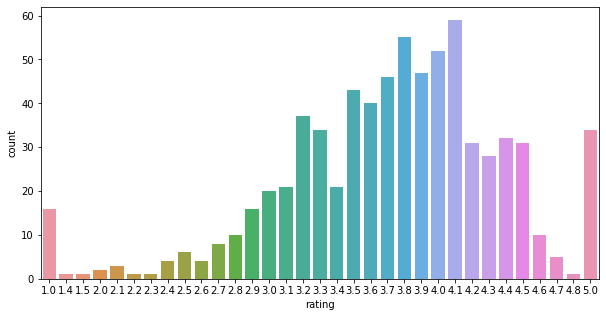

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(productData_df['rating'])
plt.show()

*  Most ratings are in the range 3 to 4.5
*  There is an inference of class imbalance as most of the products are rated average and above



### 4.5 Display average rating per brand

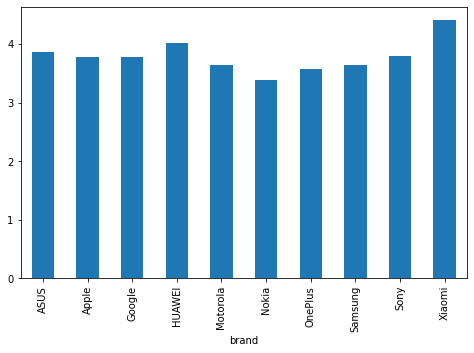

In [35]:
plt.figure(figsize=(8,5))
productData_df.groupby('brand').mean()['rating'].plot(kind='bar')
plt.show()

In [33]:
productData_df.groupby('brand').mean()['rating']

brand
ASUS       3.8600000
Apple      3.7825397
Google     3.7710526
HUAWEI     4.0218750
Motorola   3.6438095
Nokia      3.3863636
OnePlus    3.5800000
Samsung    3.6326590
Sony       3.7888889
Xiaomi     4.4152174
Name: rating, dtype: float64

Xiaomi and HUAWEI has the most average ratings compared to other products

### 4.6 Display average price per brand

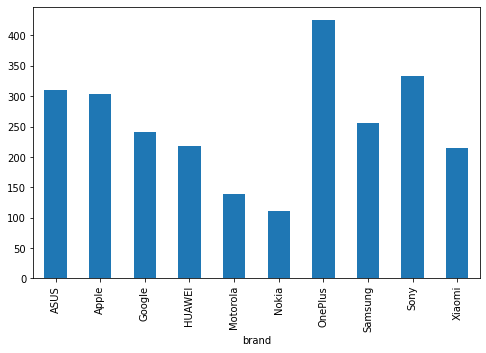

In [36]:
plt.figure(figsize=(8,5))
productData_df.groupby('brand').mean()['price'].plot(kind='bar')
plt.show()

In [37]:
productData_df.groupby('brand').mean()['price']

brand
ASUS       309.6860000
Apple      303.5811111
Google     241.8676316
HUAWEI     218.8290625
Motorola   139.1210476
Nokia      111.4438636
OnePlus    426.1960000
Samsung    256.5272543
Sony       332.7248148
Xiaomi     214.9676087
Name: price, dtype: float64

Oneplus brand seems to be more compared to other brands.
Price inference seems to be not conclusive to infer insight as we can see the apple produvts price seems to be less compared to Oneplus

### 4.7 Display average 'totalReviews' per brand

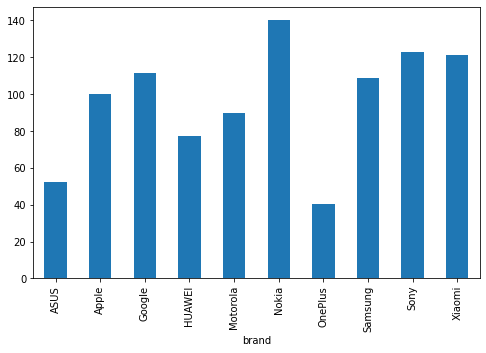

In [40]:
plt.figure(figsize=(8,5))
productData_df.groupby('brand').mean()['totalReviews'].plot(kind='bar')
plt.show()

In [ ]:
productData_df.groupby('brand').mean()['totalReviews']

brand
ASUS        52.6000000
Apple      100.2380952
Google     111.5263158
HUAWEI      77.0937500
Motorola    89.7047619
Nokia      140.5000000
OnePlus     40.6000000
Samsung    108.9624277
Sony       122.6666667
Xiaomi     121.1739130
Name: totalReviews, dtype: float64

Total reviews seems to be more for Nokia followed with Sony and Xiaomi

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [42]:
merge_df = pd.merge(productData_df,reviews_df, on='asin')

In [43]:
merge_df.shape

(67986, 15)

In [44]:
merge_df.head()

,asin,brand,title_x,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [45]:
merge_df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace=True)


In [46]:
merge_df.columns

Index(['asin', 'brand', 'review_title', 'user_rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice', 'name', 'overall_rating',
       'date', 'verified', 'item_title', 'body', 'helpfulVotes'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [47]:
verified_df = merge_df[merge_df['verified']==True]

In [48]:
verified_df.shape

(61225, 15)

### 4.11 Check the number of reviews for various brands and report the brands that have highest number of brands

In [49]:
verified_df.groupby('brand').count()

,asin,review_title,user_rating,reviewUrl,totalReviews,price,originalPrice,name,overall_rating,date,verified,item_title,body,helpfulVotes
brand,,,,,,,,,,,,,,
ASUS,206,206,206,206,206,206,206,206,206,206,206,206,206,101
Apple,4876,4876,4876,4876,4876,4876,4876,4876,4876,4876,4876,4875,4876,1631
Google,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3162,1279
HUAWEI,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,881
Motorola,7714,7714,7714,7714,7714,7714,7714,7714,7714,7714,7714,7714,7713,3010
Nokia,4878,4878,4878,4878,4878,4878,4878,4877,4878,4878,4878,4878,4877,2020
OnePlus,304,304,304,304,304,304,304,304,304,304,304,304,304,141
Samsung,31020,31020,31020,31020,31020,31020,31020,31019,31020,31020,31020,31007,31005,11198
Sony,2691,2691,2691,2691,2691,2691,2691,2691,2691,2691,2691,2691,2691,1352


In [52]:
verified_df.groupby('brand').count()['totalReviews']

brand
ASUS          206
Apple        4876
Google       3163
HUAWEI       2019
Motorola     7714
Nokia        4878
OnePlus       304
Samsung     31020
Sony         2691
Xiaomi       4207
Name: totalReviews, dtype: int64

1.   Samsung has the most number of brands
2.   It has the most number of reviews too



### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [53]:
verified_df_imp = verified_df[['brand','body','price','user_rating','item_title']]

In [54]:
verified_df_imp.shape

(61225, 5)

In [55]:
verified_df_imp.head()

,brand,body,price,user_rating,item_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,3.0000000,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,3.0000000,Phones locked
18,Motorola,The product has been very good. I had used thi...,49.9500000,3.0000000,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,2.7000000,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,2.7000000,It seems it doesn't work with the existing AT&...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

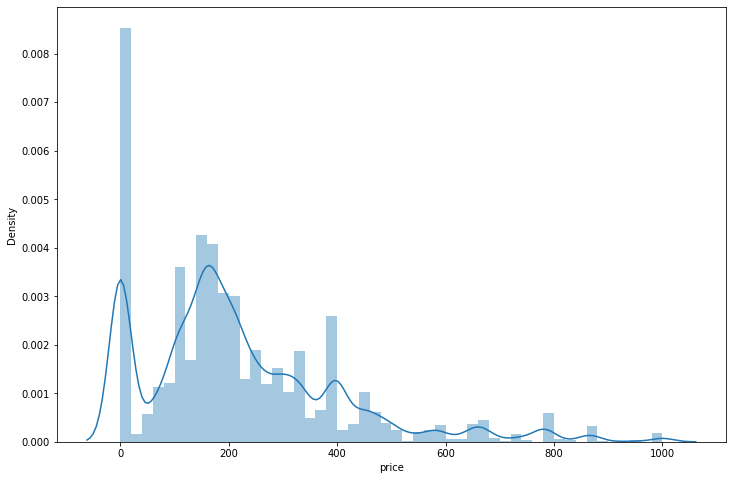

In [57]:
plt.figure(figsize=(12,8))
sns.distplot(verified_df_imp['price'])
plt.show()

1.   Most products are priced 0
2.   Prices seems to be left skewed



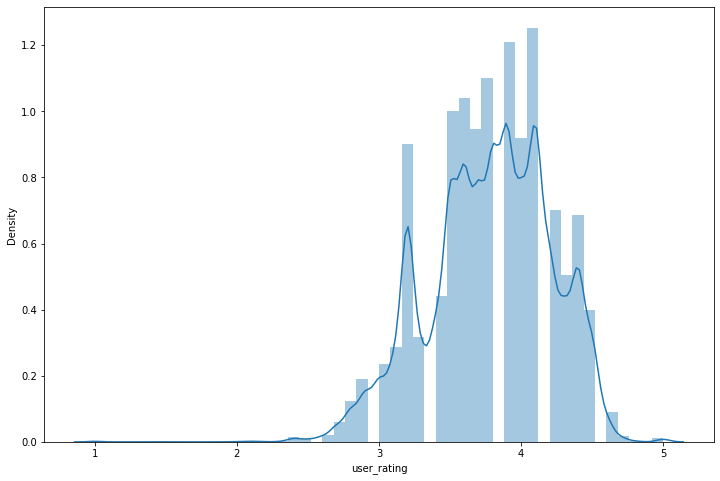

In [58]:
plt.figure(figsize=(12,8))
sns.distplot(verified_df_imp['user_rating'])
plt.show()

1.   Most user_ratings  in the range 3 to 4.5
2.   user_ratings seems to be right skewed

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [60]:
# function to create the sentiment 
def assign_sentiment(rating):
  if (rating==3):
    return 0
  elif (rating > 3):
    return 1
  else:
    return -1

In [61]:
# assigning the sentiment feature
verified_df_imp['sentiment'] = verified_df_imp['user_rating'].apply(lambda x: assign_sentiment(x))

### 4.15 Check frequency distribution of the 'sentiment'

In [62]:
verified_df_imp['sentiment'].value_counts()

 1    57967
-1     2098
 0     1160
Name: sentiment, dtype: int64

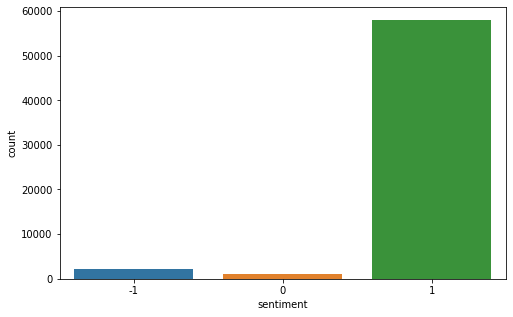

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(verified_df_imp['sentiment'])
plt.show()



*   We can see the sentiment class is imbalanced
*   Almost 95% has sentiment value of 1



### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [ ]:
pd.crosstab(verified_df_imp['sentiment'], verified_df_imp['brand']).T

sentiment,-1,0,1
brand,,,
ASUS,1,0,205
Apple,65,0,4811
Google,283,18,2862
HUAWEI,2,1,2016
Motorola,461,578,6675
Nokia,192,217,4469
OnePlus,0,0,304
Samsung,1094,100,29826
Sony,0,246,2445


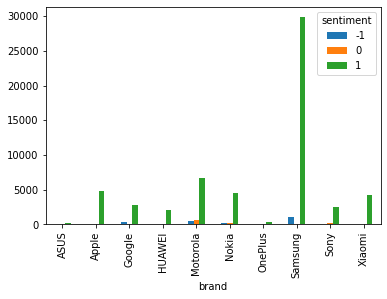

In [68]:
pd.crosstab(verified_df_imp['sentiment'], verified_df_imp['brand']).T.plot(kind='bar')

From the plot we can infer that more dissatisified customers are towards Motorola and google

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [69]:
# converting the feature to type string
verified_df_imp['body'] = verified_df_imp['body'].astype(str)

In [70]:
verified_df_imp['body'].dtype

dtype('O')

In [74]:
# converting the case to lowecase
verified_df_imp['body'] = verified_df_imp['body'].apply(lambda x : str(x).lower())

In [75]:
verified_df_imp['body'].sample(5)

64772                            amazing phone works great
29137    it is supposed to be a reconditioned phone i d...
21499                              good item for the price
65382    this phone works just as advertised it made me...
15381    great phone bought it for my wife already thin...
Name: body, dtype: object

In [76]:
verified_df_imp.head()

,brand,body,price,user_rating,item_title,sentiment
14,Motorola,dont buy out of service,49.9500000,3.0000000,Stupid phone,0
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,3.0000000,Phones locked,0
18,Motorola,the product has been very good i had used this...,49.9500000,3.0000000,Excellent product,0
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,2.7000000,"Nice, but",-1
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,2.7000000,It seems it doesn't work with the existing AT&...,-1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [77]:
# removing the punctuation for the body feature
verified_df_imp['body'] =   verified_df_imp['body'].str.replace('[^\w\s]','')

In [78]:
verified_df_imp['body'].sample(5)

37442    nice phone with a ton of features i really lik...
48912    the only thing about this phone is that it say...
49330    the 192 i spent in this phone are all there th...
64581    its a good cellphone looks so pretty and chic ...
40192    everthing is fine but taking video as it stops...
Name: body, dtype: object

In [79]:
verified_df_imp.head()

,brand,body,price,user_rating,item_title,sentiment
14,Motorola,dont buy out of service,49.9500000,3.0000000,Stupid phone,0
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,3.0000000,Phones locked,0
18,Motorola,the product has been very good i had used this...,49.9500000,3.0000000,Excellent product,0
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,2.7000000,"Nice, but",-1
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,2.7000000,It seems it doesn't work with the existing AT&...,-1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [80]:
# importing library for removing stop words
import  nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [82]:
from nltk.corpus import  stopwords

In [83]:
# setting the stop words
stop_w = set(stopwords.words('english'))

In [84]:
# removing the stop words 
verified_df_imp['body'] = verified_df_imp['body'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop_w))

In [85]:
verified_df_imp.head()

,brand,body,price,user_rating,item_title,sentiment
14,Motorola,dont buy service,49.9500000,3.0000000,Stupid phone,0
17,Motorola,1 star phones locked pay additional fees unlock,49.9500000,3.0000000,Phones locked,0
18,Motorola,product good used cell phone one projects work...,49.9500000,3.0000000,Excellent product,0
21,Motorola,bought phone replace lg phone didnt like expec...,99.9900000,2.7000000,"Nice, but",-1
22,Motorola,purchased phone att phone replacement even tho...,99.9900000,2.7000000,It seems it doesn't work with the existing AT&...,-1


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [88]:
# downloading for lemmatisation
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
# importing for lemmatisation
from nltk.stem import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [90]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)])

In [91]:
# applying lemmatisation
verified_df_imp['body'] = verified_df_imp['body'].apply(lemmatize_text)

In [92]:
verified_df_imp['body'] .sample(5)

5000     got phone 2 day fell love phone exceeded standard
28969    celular en perfecto estado todo ha funcionado ...
51158                                         easy husband
6979                                     work perfect love
20622               estaba bien pero funcionaba con mi red
Name: body, dtype: object

In [93]:
verified_df_imp.head()

,brand,body,price,user_rating,item_title,sentiment
14,Motorola,dont buy service,49.9500000,3.0000000,Stupid phone,0
17,Motorola,1 star phone locked pay additional fee unlock,49.9500000,3.0000000,Phones locked,0
18,Motorola,product good used cell phone one project worke...,49.9500000,3.0000000,Excellent product,0
21,Motorola,bought phone replace lg phone didnt like expec...,99.9900000,2.7000000,"Nice, but",-1
22,Motorola,purchased phone att phone replacement even tho...,99.9900000,2.7000000,It seems it doesn't work with the existing AT&...,-1


In [ ]:
#df_new = verified_df_imp[: int(verified_df_imp.shape[0]*.2)]

### 5.5 Write a function to check word frequency of the text

### 5.6 Check word frequency of review having top ratings (sentimet = 1) and display output of few samples

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [94]:
# importing for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tfidf_vec= TfidfVectorizer()

In [96]:
# applying tf-idf vectorizer to the foatures
tfidf_data = tfidf_vec.fit_transform(verified_df_imp['body'])

In [97]:
tfidf_data.shape

(61225, 36034)

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [98]:
X = tfidf_data

In [99]:
y = verified_df_imp['sentiment']

### 5.9 Split the data into Train & Test Sets

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
# splitting to train and test
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 7)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [103]:
# buiding random forest regressor
from sklearn.ensemble  import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
# training score
rf1.score(x_train, y_train)

0.9937932836796027

In [105]:
# testing score
rf1.score(x_test, y_test)

0.9437512249297707

In [106]:
y_pred = rf1.predict(x_test)

In [114]:
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predict -1', 'Predict 0', 'Predict 1'], index = ['Actual -1', 'Actual 0','Actual 1'])
cnf_matrix

,Predict -1,Predict 0,Predict 1
Actual -1,3,4,536
Actual 0,0,1,288
Actual 1,20,13,14442


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.13      0.01      0.01       543
           0       0.06      0.00      0.01       289
           1       0.95      1.00      0.97     14475

    accuracy                           0.94     15307
   macro avg       0.38      0.34      0.33     15307
weighted avg       0.90      0.94      0.92     15307



## 7. Write your conclusion

* Model is overfit
* From the model we can infer the sentiment class is highly imbalanced.
* The ability to detect sentiment value is almost 0 for -1 and 0 
* The ability to detect sentiment value 1 is very high
* Precision of detecting is very high(95%) for sentiment value 1 since the we  more values for set for sentiment value of 1 
* We may be able to improve if we have more training data and also if the data could provide more balance to the ratings which can have a balance to the sentiment values






